In [1]:
import random
import os
import shutil

folder_name = "dataset_v10"
directory_images_source = f"{folder_name}/images"
directory_train_images = f"{folder_name}/train/images"
directory_train_labels = f"{folder_name}/train/labels"
directory_val_images = f"{folder_name}/val/images"
directory_val_labels = f"{folder_name}/val/labels"
directory_test_images = f"{folder_name}/test/images"
directory_test_labels = f"{folder_name}/test/labels"

isTrainImagesExist = os.path.exists(f"{folder_name}/train/images")
isTrainLabelsExist = os.path.exists(f"{folder_name}/train/labels")
isTestLabelsExist = os.path.exists(f"{folder_name}/test/labels")
isTestImagesExist = os.path.exists(f"{folder_name}/test/images")
isValImagesExist = os.path.exists(f"{folder_name}/val/images")
isValLabelsExist = os.path.exists(f"{folder_name}/val/labels")

if not isTrainImagesExist:  
  # Create a new directory because it does not exist 
  os.makedirs(f"{folder_name}/train/images")

if not isTrainLabelsExist:  
  # Create a new directory because it does not exist 
  os.makedirs(f"{folder_name}/train/labels")

if not isTestImagesExist:  
  # Create a new directory because it does not exist 
  os.makedirs(f"{folder_name}/test/images")

if not isTestLabelsExist:  
  # Create a new directory because it does not exist 
  os.makedirs(f"{folder_name}/test/labels")

if not isValImagesExist:  
  # Create a new directory because it does not exist 
  os.makedirs(f"{folder_name}/val/images")

if not isValImagesExist:  
  # Create a new directory because it does not exist 
  os.makedirs(f"{folder_name}/val/labels")


def train_test_val(directory_images, directory_labels, filename_images):
    images_split = filename_images.path.split("/")
    labels_replace = images_split[2].replace(".JPG", ".txt")
    images_new_path = f"{directory_images}/{images_split[2]}"
    labels_new_path = f"{directory_labels}/{labels_replace}"
    labels_source_directory = filename_images.path.replace(".JPG", ".txt")
    labels_source_directory = labels_source_directory.replace("images", "labels")
    return filename_images.path, images_new_path, labels_source_directory,labels_new_path

for filename_images in os.scandir(directory_images_source) :
    rng = random.randint(1, 10)
    if rng >=1 and rng <=8:
        train = train_test_val(directory_train_images, directory_train_labels, filename_images)
        shutil.move(train[0], train[1])
        shutil.move(train[2],train[3])
    elif rng == 9:
        val = train_test_val(directory_val_images, directory_val_labels, filename_images)
        shutil.move(val[0], val[1])
        shutil.move(val[2],val[3])
    elif rng == 10:
        test = train_test_val(directory_test_images, directory_test_labels, filename_images)
        shutil.move(test[0], test[1])
        shutil.move(test[2],test[3])

shutil.move(folder_name, 'dataset_all/')

'dataset_all/dataset_v10'

In [9]:
#Entrainement
!python3 train.py --img 1088 --cfg yolov5n.yaml --hyp data/hyps/hyp.scratch-high.yaml --batch-size -1 --epochs 2000 --data dataset_all/dataset_v5/data.yaml --weights yolov5s.pt --workers 24 --name training

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=yolov5n.yaml, data=dataset_chantier_a/data.yaml, hyp=hyp.scratch.yaml, epochs=2000, batch_size=-1, imgsz=1080, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=test_label_numbers, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-103-gc89af7a Python-3.10.4 torch-1.12.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1060 3GB, 3011MiB)

hyperparam

In [1]:
#Inference::
!python3 detect.py --source 'image_a_tester/' --weights 'train/best.pt' --conf 0.3 --project 'inference_test' --line-thickness 5  --save-crop

detect: weights=['train/best.pt'], source=image_a_tester/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=inference_test, name=exp, exist_ok=False, line_thickness=5, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-103-gc89af7a Python-3.10.4 torch-1.12.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1060 3GB, 3011MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
image 1/18 /home/thienvu/yolov5/image_a_tester/G0017107.JPG: 480x640 1 0.6, 1 0.8, 1 2.6, 11.0ms
image 2/18 /home/thienvu/yolov5/image_a_tester/G0017108.JPG: 480x640 1 0.5, 1 0.6, 1 0.8, 3 0.85s, 5 2.6s, 10.6ms
image 3/18 /home/thienvu/yolov5/image_a_tester/G0017109.JPG: 480x640 2 0.5s, 1 0.6, 1 0.7, 3 0.85s, 3 1.0s, 3 2.6s, 11.1ms
image 4/18 /

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("results.csv")

In [7]:
df

epoch        train/box_loss        train/obj_loss  \
0                       0              0.133050              0.051216   
1                       1              0.126910              0.039736   
2                       2              0.126510              0.032861   
3                       3              0.119050              0.026921   
4                       4              0.117210              0.029772   
..                    ...                   ...                   ...   
953                   953              0.025306              0.011459   
954                   954              0.025291              0.011691   
955                   955              0.024640              0.012249   
956                   956              0.025489              0.011612   
957                   957              0.025987              0.013724   

           train/cls_loss     metrics/precision        metrics/recall  \
0                0.041240              0.000000              0.000000   
1                0.040325              0.000000              0.000000   
2                0.041694              0.000000              0.000000   
3                0.038755              0.000087              0.001235   
4                0.039238              0.000117              0.001235   
..                    ...                   ...                   ...   
953              0.005795              0.616660              0.560550   
954              0.007186              0.631070              0.533740   
955              0.007071              0.608450              0.551930   
956              0.006904              0.602320              0.548750   
957              0.006973              0.603330              0.547700   

          metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
0                 0.00000              0.000000              0.134680   
1                 0.00000              0.000000              0.126260   
2                 0.00000              0.000000              0.123720   
3                 0.00005              0.000030              0.120750   
4                 0.00006              0.000006              0.113250   
..                    ...                   ...                   ...   
953               0.56511              0.314900              0.029788   
954               0.55998              0.314120              0.029732   
955               0.56343              0.317170              0.029704   
956               0.56308              0.313250              0.029996   
957               0.56684              0.315190              0.030114   

             val/obj_loss          val/cls_loss                 x/lr0  \
0                0.035923              0.044659              0.092800   
1                0.031602              0.043418              0.084699   
2                0.030087              0.042089              0.076598   
3                0.031840              0.042748              0.068495   
4                0.034108              0.041358              0.060392   
..                    ...                   ...                   ...   
953              0.023872              0.020700              0.005716   
954              0.024436              0.020777              0.005712   
955              0.024732              0.020632              0.005707   
956              0.024421              0.020355              0.005703   
957              0.023651              0.020171              0.005698   

                    x/lr1                 x/lr2  
0                0.000800              0.000800  
1                0.001699              0.001699  
2                0.002598              0.002598  
3                0.003495              0.003495  
4                0.004392              0.004392  
..                    ...                   ...  
953              0.005716              0.005716  
954              0.005712              0.005712  
955              0.005707              0.005707  
956         

In [9]:
df.columns

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

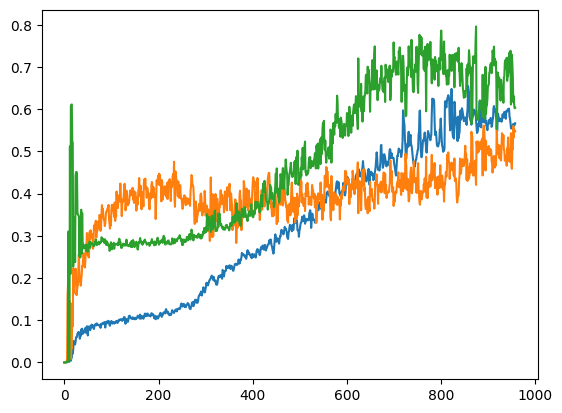

In [13]:
plt.plot(df["               epoch"], df["     metrics/mAP_0.5"])
plt.plot(df["               epoch"], df["      metrics/recall"])
plt.plot(df["               epoch"], df["   metrics/precision"])

In [3]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#                                            'custom', 'path/to/best.pt')  # custom model

# Images
im = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, URL, PIL, OpenCV, numpy, list

# Inference
results = model(im)

# Results
results.()  # or .show(), .save(), .crop(), .pandas(), etc.

results.xyxy[0]  # im predictions (tensor)
results.pandas().xyxy[0]  # im predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

Using cache found in /home/thienvu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-13 Python-3.10.4 torch-1.12.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1060 3GB, 3011MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


xmin        ymin         xmax        ymax  confidence  class    name
0  743.290588   48.343811  1141.756592  720.000000    0.879860      0  person
1  441.989624  437.336670   496.585083  710.036255    0.675119     27     tie
2  123.051056  193.238037   714.690674  719.771301    0.666694      0  person
3  978.989807  313.579468  1025.302856  415.526184    0.261517     27     tie


(eog:4231): Gtk-WARNING **: 15:01:48.600: Could not load a pixbuf from icon theme.
This may indicate that pixbuf loaders or the mime database could not be found.
